In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv




In [69]:
feature_data = pd.read_csv('features-train.tsv',delimiter="\t")
clarity_dataset = pd.read_csv('clarity-scores-train.tsv',delimiter="\t")
quality_dataset = pd.read_csv('quality-scores-train.tsv',delimiter="\t")
test_dataset = pd.read_csv('features-test.tsv',delimiter="\t")

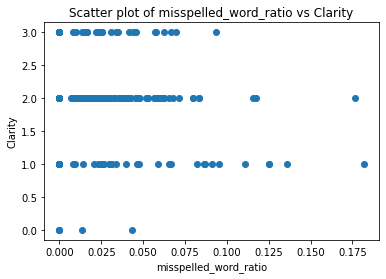

In [67]:
plt.scatter(feature_data["misspelled_word_ratio"],clarity_dataset["clarity"])
plt.xlabel('misspelled_word_ratio')
plt.ylabel('Clarity')
plt.title('Scatter plot of misspelled_word_ratio vs Clarity')
plt.show()

In [55]:
def lms(features,clarity, x2=0, y2=0):
    w0,w1 = 0,0
    x1 = np.mean(features["misspelled_word_ratio"])
    y1 = np.mean(clarity["clarity"])
    
    n = len(features)
    
#     x_values = [(row["misspelled_word_ratio"]) for row in features]
     #ypred =[w0 + w1*x for x in feature_data["misspelled_word_ratio"]]
    for i in range(n):
        xpred = features["misspelled_word_ratio"][i]
        ypred = clarity["clarity"][i]
#        
        x2 += (xpred-x1) *(ypred-y1)
        y2 += (xpred-x1)**2
        w0 = x2/y2
        w1 = y1-w0*x1
        
    return w0, w1    
        

In [50]:
w0, w1 = lms(feature_data,clarity_dataset)

In [51]:
w0

-3.6188841824154507

In [52]:
w1

2.107908001443444

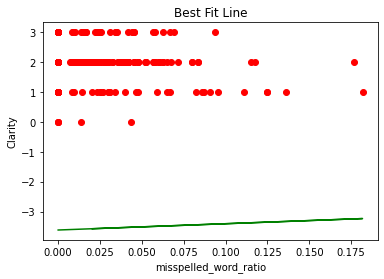

In [68]:
plt.scatter(feature_data["misspelled_word_ratio"],clarity_dataset["clarity"], color='red')
plt.plot(feature_data["misspelled_word_ratio"], [w0 + w1*x for x in feature_data["misspelled_word_ratio"]], color='green')
plt.xlabel('misspelled_word_ratio')
plt.ylabel('Clarity')
plt.title('Best Fit Line')
plt.show()

In [64]:
# rss = sum([(clarity_dataset["clarity"][i]-(w0 +w1* feature_data["misspelled_word_ratio"][i]))**2 for i in range(len(feature_data))])
# rss

8091.909212169797

In [65]:
rss=0
for i in range(len(feature_data)):
    rss+= (clarity_dataset["clarity"][i] - (w0 +w1* feature_data["misspelled_word_ratio"][i]))**2
rss

8091.909212169797